# Unsupervised Machine Learning- Clustering

## Table of Contents
1) Import Data
2) Clean Data
3) Elbow technique
4) Clustering

### 1)Import Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy
import sklearn
from sklearn.cluster import KMeans #for unspervised data
import pylab as pl

In [2]:
#import file
path = r'/Users/brandeefairnot/Library/CloudStorage/OneDrive-Personal/Documents/Final Achievement/'
HPInt = pd.read_excel(os.path.join(path, 'HomePrice_Interest.xlsx'), index_col = False)

### 2)Clean data

In [3]:
#remove the state column
df_new = HPInt.drop(columns = ['State'])
df_new.head()

2008 Avg Home Price  2008 Avg Interest Rate  2009 Avg Home Price  \
0            177982.18                6.067727            173267.48   
1            227875.00                6.067727            230575.00   
2            255759.38                6.067727            211220.78   
3            131134.29                6.067727            133429.02   
4            423674.07                6.067727            357152.78   

   2009 Avg Interest Rate  2010 Avg Home Price  2010 Avg Interest Rate  \
0                5.036538            188644.82                4.689808   
1                5.036538            238145.83                4.689808   
2                5.036538            189878.60                4.689808   
3                5.036538            138303.70                4.689808   
4                5.036538            352133.48                4.689808   

   2011 Avg Home Price  2011 Avg Interest Rate  2012 Avg Home Price  \
0            174434.43                4.447885            163795.58   
1            233008.33                4.447885            227620.83   
2            171388.42                4.447885            172778.48   
3            135247.97                4.447885            142763.41   
4            335798.21                4.447885            346532.83   

   2012 Avg Interest Rate  ...  2015 Avg Home Price  2015 Avg Interest Rate  \
0                  3.6575  ...            165299.20                3.850577   
1                  3.6575  ...            270091.67                3.850577   
2                  3.6575  ...            212288.42                3.850577   
3                  3.6575  ...            135122.87                3.850577   
4                  3.6575  ...            483847.59                3.850577   

   2016 Avg Home Price  2016 Avg Interest Rate  2017 Avg Home Price  \
0            167952.80                3.654038            171449.36   
1            282044.44                3.654038            281391.67   
2            223095.94                3.654038            242031.71   
3            137652.63                3.654038            139793.32   
4            514424.53                3.654038            540315.16   

   2017 Avg Interest Rate  2018 Avg Home Price  2018 Avg Interest Rate  \
0                3.989808            182111.01                4.544615   
1                3.989808            285725.00                4.544615   
2                3.989808            268405.51                4.544615   
3                3.989808            145735.59                4.544615   
4                3.989808            592381.51                4.544615   

   2019 Avg Home Price  2019 Avg Interest Rate  
0            192030.01                3.935769  
1            299036.36                3.935769  
2            283303.21                3.935769  
3            154556.53                3.935769  
4            605430.07                3.935769  

[5 rows x 24 columns]

### 3) Elbow technique

In [4]:
#range of potential clusters
num_cl = range(1,10)

In [7]:
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(df_new).score(df_new)for i in
range(len(kmeans))]
score

/Users/brandeefairnot/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brandeefairnot/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brandeefairnot/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brandeefairnot/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

[-4507354407787.747,
 -1810502597086.81,
 -951755469724.9203,
 -638990473366.2427,
 -421005318449.54834,
 -338365768393.24225,
 -268086972218.21896,
 -214207787748.31873,
 -183409489560.84125]

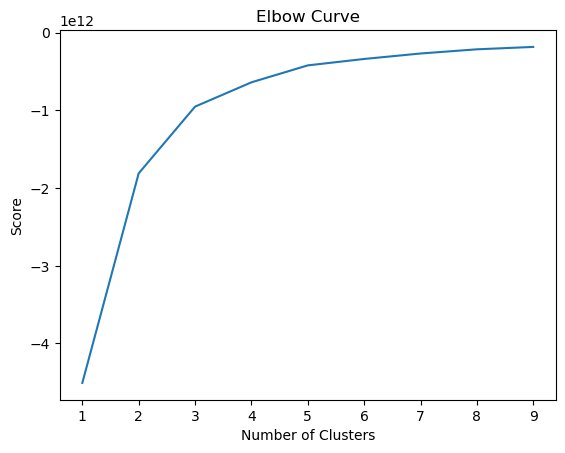

In [14]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score),
pl.xlabel('Number of Clusters'),
pl.ylabel('Score'),
pl.title('Elbow Curve'),
pl.show()

### 4) Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

The elbow breaks at point 3 and starts to flatten out at point 5, so that's why I'll be choosing 5 for the number of cluster groups.

### 5) KMeans algorithm

In [15]:
#create k-means object
kmeans = KMeans(n_clusters=5)

In [16]:
#k-means object to the data
kmeans.fit(df_new)

/Users/brandeefairnot/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

### 6) Create a column for cluster 

In [19]:
df_new['Cluster'] = kmeans.fit_predict(df_new)
df_new.head()

/Users/brandeefairnot/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2008 Avg Home Price  2008 Avg Interest Rate  2009 Avg Home Price  \
0            177982.18                6.067727            173267.48   
1            227875.00                6.067727            230575.00   
2            255759.38                6.067727            211220.78   
3            131134.29                6.067727            133429.02   
4            423674.07                6.067727            357152.78   

   2009 Avg Interest Rate  2010 Avg Home Price  2010 Avg Interest Rate  \
0                5.036538            188644.82                4.689808   
1                5.036538            238145.83                4.689808   
2                5.036538            189878.60                4.689808   
3                5.036538            138303.70                4.689808   
4                5.036538            352133.48                4.689808   

   2011 Avg Home Price  2011 Avg Interest Rate  2012 Avg Home Price  \
0            174434.43                4.447885            163795.58   
1            233008.33                4.447885            227620.83   
2            171388.42                4.447885            172778.48   
3            135247.97                4.447885            142763.41   
4            335798.21                4.447885            346532.83   

   2012 Avg Interest Rate  ...  2015 Avg Interest Rate  2016 Avg Home Price  \
0                  3.6575  ...                3.850577            167952.80   
1                  3.6575  ...                3.850577            282044.44   
2                  3.6575  ...                3.850577            223095.94   
3                  3.6575  ...                3.850577            137652.63   
4                  3.6575  ...                3.850577            514424.53   

   2016 Avg Interest Rate  2017 Avg Home Price  2017 Avg Interest Rate  \
0                3.654038            171449.36                3.989808   
1                3.654038            281391.67                3.989808   
2                3.654038            242031.71                3.989808   
3                3.654038            139793.32                3.989808   
4                3.654038            540315.16                3.989808   

   2018 Avg Home Price  2018 Avg Interest Rate  2019 Avg Home Price  \
0            182111.01                4.544615            192030.01   
1            285725.00                4.544615            299036.36   
2            268405.51                4.544615            283303.21   
3            145735.59                4.544615            154556.53   
4            592381.51                4.544615            605430.07   

   2019 Avg Interest Rate  Cluster  
0                3.935769        0  
1                3.935769        4  
2                3.935769        4  
3                3.935769        0  
4                3.935769        1  

[5 rows x 25 columns]

In [20]:
df_new['Cluster'].value_counts()

0    21
4    16
2     9
1     3
3     2
Name: Cluster, dtype: int64

### 7) Create cluster scatterplot

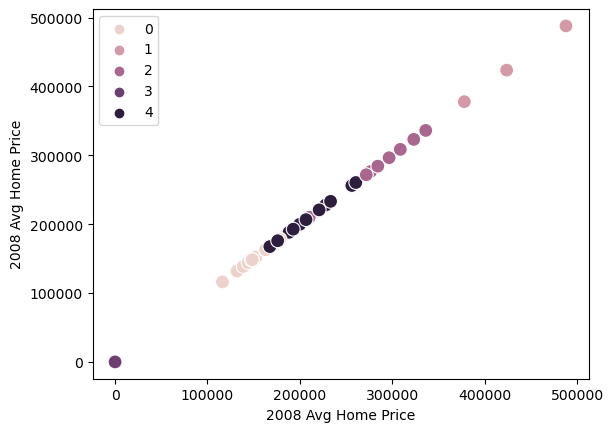

In [28]:
ax = sns.scatterplot(x=df_new['2008 Avg Home Price'], y=df_new[
    '2008 Avg Home Price'], hue=kmeans.labels_, s=100)
ax.grid(False), 
plt.xlabel('2008 Avg Home Price'), 
plt.ylabel('2008 Avg Home Price'),
plt.show()

### 8) Does or doesn't the cluster make sense

The cluster diagram makes sense cause the home prices are on the x and y axis. To spread the points out, I could use the interest rate avg by month or quarter so they're not all in 1 line. 

### 9) Calculate the descriptive statistics for your clusters using the groupby()

In [31]:
df_new.groupby('Cluster').agg({'2008 Avg Home Price':['mean', 'median']})

2008 Avg Home Price            
                       mean      median
Cluster                                
0             158594.783333  162314.810
1             429808.580000  423674.070
2             284891.974444  284287.930
3                  0.000000       0.000
4             212448.775000  206241.895

### 10) Propose what these results could be useful for in future steps of an analytics pipeline.

These descriptive statistics could be used to find the mean or median of each cluster group to determine if the median/average is close to the line best fit or to see where the average or each cluster falls on the graph compared to the other cluster averages. I'm not sure why my meidan and mean for cluster 3 are equal to 0 though. 